In [1]:
import cv2
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

In [2]:
# Matplotlib figure size to have large enough image plotting
#FIGURE_SIZE = (12, 6)
FIGURE_SIZE = (6, 3)

def plot_bgr(img):
    """ A helper for plotting a BGR image with matplotlib """
    plt.figure(figsize=FIGURE_SIZE)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
def plot_gray(gray):
    """ A helper for plotting a grayscale image with matplotlib """
    plt.figure(figsize=FIGURE_SIZE)
    plt.imshow(gray, cmap='gray')

In [3]:
IMG_PATH = "/home/rattus/Free/Udacity/CarND-Capstone/imgs/traffic/samples"
images = os.listdir(IMG_PATH)
images.sort()

In [4]:
def clamp_saturation(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    sat = hsv[:,:,1]
    val = hsv[:,:,2]
    mask = np.zeros(sat.shape)
    mask[sat > 180] += 100
    mask[val > 150] += 100
    mask[mask < 200] = 0
    mask[mask >= 200] = 1
    return mask.astype(np.uint8)

In [5]:
def detect_state(masked_light):
    red_mean = masked_light[:,:,2].mean()
    green_mean = masked_light[:,:,1].mean()
    blue_mean = masked_light[:,:,0].mean()
    
    red_green_diff_ratio = 1 / (abs(red_mean - green_mean) + 0.01)
    non_blue_ratio = (red_mean + green_mean) / 2 * blue_mean
    #print("nonbl ", red_green_diff_ratio, non_blue_ratio)
    yellow_mean = red_green_diff_ratio * non_blue_ratio
    # States: 0 - red, 1 - yellow, 2 - green, 3 - Unknown
    #print("R, G, B, Y : {:0.2f}, {:0.2f}, {:0.2f}, {:0.2f}"
    #      .format(red_mean, green_mean, blue_mean, yellow_mean))
    indices = np.array([red_mean, yellow_mean, green_mean])
    if (indices.max() < 0.1):
        return 3
    return indices.argmax()

State  0
State  2
State  1
State  0
State  1
State  3
State  3
State  2


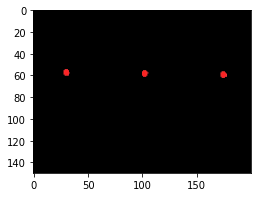

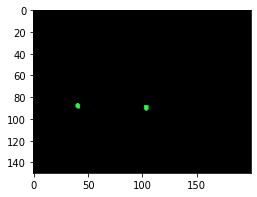

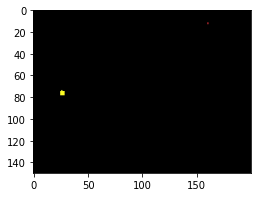

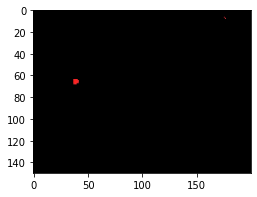

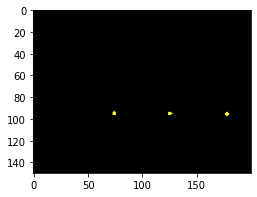

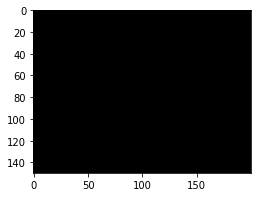

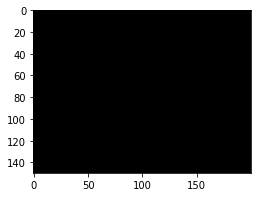

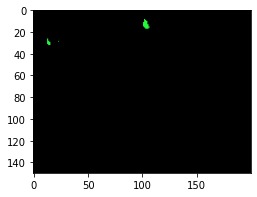

In [6]:
for i in range(8):
    img = cv2.resize(cv2.imread(os.path.join(IMG_PATH, images[i])), (200,150))
    #print("imshape :", img.shape)
    #plot_bgr(img)
    mask = clamp_saturation(img)
    lights_only = np.zeros(img.shape)
    #print("lights_only :", lights_only.shape)
    #print("mask :", mask.shape)
    lights_only = cv2.bitwise_and(img, img, mask=mask)
    #print("lights_only :", lights_only.shape)
    plot_bgr(lights_only)
    state = detect_state(lights_only)
    print("State ", state)